In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc  ### 이 줄
# import scienceplots

plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

from datetime import datetime

# import warnings
# warnings.filterwarnings("ignore")

# plt.style.use('seaborn-deep')
# plt.style.use(['science'])
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

%matplotlib inline

In [3]:
df1 = pd.read_csv("/Users/hyunseokjung/data/crisis_mmd/hurricane_harvey_final_data.tsv",
                   delimiter = "\t")
df2 = pd.read_csv("/Users/hyunseokjung/data/crisis_mmd/hurricane_irma_final_data.tsv",
                   delimiter = "\t")
df3 = pd.read_csv("/Users/hyunseokjung/data/crisis_mmd/hurricane_maria_final_data.tsv",
                   delimiter = "\t")
df4 = pd.read_csv("/Users/hyunseokjung/data/crisis_mmd/california_wildfires_final_data.tsv",
                   delimiter = "\t")
df5 = pd.read_csv("/Users/hyunseokjung/data/crisis_mmd/iraq_iran_earthquake_final_data.tsv",
                   delimiter = "\t")
df6 = pd.read_csv("/Users/hyunseokjung/data/crisis_mmd/mexico_earthquake_final_data.tsv",
                   delimiter = "\t")
df7 = pd.read_csv("/Users/hyunseokjung/data/crisis_mmd/srilanka_floods_final_data.tsv",
                   delimiter = "\t")

In [4]:
df1['category'] = 'hurricane'
df2['category'] = 'hurricane'
df3['category'] = 'hurricane'
df4['category'] = 'wildfire'
df5['category'] = 'earthquake'
df6['category'] = 'earthquake'
df7['category'] = 'flood'

In [5]:
# df7.head()

In [6]:
df_temporal1 = df1[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf', 'tweet_text', 'category']]
df_temporal2 = df2[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf', 'tweet_text', 'category']]
df_temporal3 = df3[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf', 'tweet_text', 'category']]
df_temporal4 = df4[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf', 'tweet_text', 'category']]
df_temporal5 = df5[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf', 'tweet_text', 'category']]
df_temporal6 = df6[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf', 'tweet_text', 'category']]
df_temporal7 = df7[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf', 'tweet_text', 'category']]

In [50]:
df_final = pd.concat([df_temporal1, df_temporal2, df_temporal3, df_temporal4, df_temporal5, df_temporal6, df_temporal7])
df_final = df_final.reset_index(drop=True)
df_final

,tweet_id,text_info,text_info_conf,text_human,text_human_conf,tweet_text,category
0,905274232590004225,not_informative,1.0000,not_humanitarian,1.0000,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",hurricane
1,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
2,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
3,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
4,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
...,...,...,...,...,...,...,...
18077,881714673157980160,not_informative,1.0000,not_humanitarian,1.0000,Get to mora and try the whole menu https://t.c...,flood
18078,881749861871362049,not_informative,1.0000,not_humanitarian,1.0000,"Mirka Mora (b.1928), noted French-born Austral...",flood
18079,881770990556131328,not_informative,1.0000,not_humanitarian,1.0000,"@PaulMalignaggi Lol What u on about, Sergio Mo...",flood
18080,881807298930368513,not_informative,0.5056,not_humanitarian,0.5056,#Cameroon : 4 #female suicide #Bombers kill 1 ...,flood


In [53]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [54]:
metadata.detect_from_dataframe(data=df_final)

In [55]:
metadata

{
    "columns": {
        "tweet_id": {
            "sdtype": "numerical"
        },
        "text_info": {
            "sdtype": "categorical"
        },
        "text_info_conf": {
            "sdtype": "numerical"
        },
        "text_human": {
            "sdtype": "categorical"
        },
        "text_human_conf": {
            "sdtype": "numerical"
        },
        "tweet_text": {
            "sdtype": "categorical"
        },
        "category": {
            "sdtype": "categorical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}

In [28]:
# from sdv.single_table import CTGANSynthesizer

# synthesizer = CTGANSynthesizer(metadata,
#                               enforce_min_max_values=True,
#                               batch_size=256,
#                               epochs=1024)
# synthesizer.fit(ori_df)

# synthetic_data = synthesizer.sample(num_rows=10)

In [56]:
# from sdv.single_table import TVAESynthesizer

# # TVAE
# synthesizer = TVAESynthesizer(metadata,
#                               enforce_min_max_values=True,
#                               batch_size=128, # default: 256
#                               epochs=1024) # default: 1024
# synthesizer.fit(df_final)

# synthetic_data = synthesizer.sample(num_rows=10)

/Users/hyunseokjung/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/Users/hyunseokjung/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/Users/hyunseokjung/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


In [58]:
# synthesizer.save(
#     filepath='/Users/hyunseokjung/Github/dc-vae/trained_disaster_e1024_b128.pkl'
# )

In [14]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer.load(
    filepath='model/trained_disaster_e1024_b128.pkl'
)

In [17]:
df_final

,tweet_id,text_info,text_info_conf,text_human,text_human_conf,tweet_text,category
0,905274232590004225,not_informative,1.0000,not_humanitarian,1.0000,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",hurricane
1,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
2,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
3,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
4,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
...,...,...,...,...,...,...,...
1017,881714673157980160,not_informative,1.0000,not_humanitarian,1.0000,Get to mora and try the whole menu https://t.c...,flood
1018,881749861871362049,not_informative,1.0000,not_humanitarian,1.0000,"Mirka Mora (b.1928), noted French-born Austral...",flood
1019,881770990556131328,not_informative,1.0000,not_humanitarian,1.0000,"@PaulMalignaggi Lol What u on about, Sergio Mo...",flood
1020,881807298930368513,not_informative,0.5056,not_humanitarian,0.5056,#Cameroon : 4 #female suicide #Bombers kill 1 ...,flood


In [86]:
synthetic_data = synthesizer.sample(num_rows=18000) # 200000
synthetic_data

,tweet_id,text_info,text_info_conf,text_human,text_human_conf,tweet_text,category
0,923183076501652864,not_informative,0.6878,not_humanitarian,0.6921,Day 23 (+12 day intermission): Swansboro to Vi...,hurricane
1,917327510272997888,informative,0.9998,rescue_volunteering_or_donation_effort,0.9999,RT @sapphixy: Prisoners rescue deaf dogs evacu...,wildfire
2,913137445382937856,not_informative,1.0000,not_humanitarian,0.9997,"Spoiler alert, the Jones Act is problematic an...",hurricane
3,920923196112440192,informative,0.6734,affected_individuals,0.6640,Trump unveils plan to fight California wildfir...,wildfire
4,921895008740475008,not_informative,0.9999,not_humanitarian,0.9999,https://t.co/CVNrQt51za #style Nike Air 323085...,hurricane
...,...,...,...,...,...,...,...
17995,905253725721561216,informative,0.6591,rescue_volunteering_or_donation_effort,0.6569,RT @CATEChs: Busy prepping for the Hurricane H...,hurricane
17996,909877547810544896,informative,1.0000,rescue_volunteering_or_donation_effort,0.9998,Join the Thomson YMCA yogis this weekend for a...,hurricane
17997,906985454236251776,informative,0.7099,infrastructure_and_utility_damage,0.7090,In an era of dire climate records the US and S...,hurricane
17998,908103552202043392,informative,0.6854,other_relevant_information,0.6841,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",hurricane


In [52]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         20000 non-null  int64  
 1   text_info        20000 non-null  object 
 2   text_info_conf   20000 non-null  float64
 3   text_human       20000 non-null  object 
 4   text_human_conf  20000 non-null  float64
 5   tweet_text       20000 non-null  object 
 6   category         20000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [53]:
metadata_final = SingleTableMetadata()

metadata_final.detect_from_dataframe(data=synthetic_data)

In [63]:
df_final.head()

,tweet_id,text_info,text_info_conf,text_human,text_human_conf,tweet_text,category
0,905274232590004225,not_informative,1.0000,not_humanitarian,1.0000,"CONGRATS ON HITTING YOIR GOAL GUYS, I'm sure t...",hurricane
1,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
2,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
3,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane
4,901646074527535105,informative,0.6822,injured_or_dead_people,0.6822,RT @ajwamood: #ajwamood : Harvey the first maj...,hurricane


In [18]:
synthetic_data.head()

,tweet_id,text_info,text_info_conf,text_human,text_human_conf,tweet_text,category
0,902920535962586368,informative,1.0000,other_relevant_information,0.9998,RT @Wx_Geek: Tornado warning has been issued f...,hurricane
1,923823992742297728,informative,0.6734,infrastructure_and_utility_damage,0.6723,'Tragic on so many levels': Most California wi...,wildfire
2,906585313863470080,not_informative,0.6527,not_humanitarian,0.6526,Did President Trump Show all his Heartless in ...,hurricane
3,909378135733038848,not_informative,0.6721,not_humanitarian,0.6728,The family room of the Miami penthouse feature...,hurricane
4,910006338912177536,informative,1.0000,rescue_volunteering_or_donation_effort,0.9998,"Scarlett Johansson organized a special, star-s...",hurricane


In [132]:
synthetic_data_w = synthesizer.sample(num_rows=120000)
synthetic_data_f = synthesizer.sample(num_rows=200000)
synthetic_data_e = synthesizer.sample(num_rows=40000)

In [148]:
synthetic_data_h = synthesizer.sample(num_rows=20000)

In [149]:
synthetic_data_h = synthetic_data_h[synthetic_data_h['category'] == 'hurricane']
synthetic_data_w = synthetic_data_w[synthetic_data_w['category'] == 'wildfire']
synthetic_data_f = synthetic_data_f[synthetic_data_f['category'] == 'flood']
synthetic_data_e = synthetic_data_e[synthetic_data_e['category'] == 'earthquake']

In [150]:
synthetic_data_final = pd.concat([synthetic_data, synthetic_data_h, synthetic_data_w, synthetic_data_f, synthetic_data_e])
synthetic_data_final = synthetic_data_final.reset_index(drop=True)
synthetic_data_final

,tweet_id,text_info,text_info_conf,text_human,text_human_conf,tweet_text,category
0,923183076501652864,not_informative,0.6878,not_humanitarian,0.6921,Day 23 (+12 day intermission): Swansboro to Vi...,hurricane
1,917327510272997888,informative,0.9998,rescue_volunteering_or_donation_effort,0.9999,RT @sapphixy: Prisoners rescue deaf dogs evacu...,wildfire
2,913137445382937856,not_informative,1.0000,not_humanitarian,0.9997,"Spoiler alert, the Jones Act is problematic an...",hurricane
3,920923196112440192,informative,0.6734,affected_individuals,0.6640,Trump unveils plan to fight California wildfir...,wildfire
4,921895008740475008,not_informative,0.9999,not_humanitarian,0.9999,https://t.co/CVNrQt51za #style Nike Air 323085...,hurricane
...,...,...,...,...,...,...,...
55378,909594222896180352,not_informative,0.6801,not_humanitarian,0.6787,Diego Luna takes a knee on â€˜Conanâ€™ and get...,earthquake
55379,910855394887964672,informative,1.0000,infrastructure_and_utility_damage,0.9999,"Unsafe building, earthquake result in west of ...",earthquake
55380,910713722264533632,informative,0.7464,rescue_volunteering_or_donation_effort,0.7460,Rescue crews in Mexico City are still trying t...,earthquake
55381,910543481452788224,informative,0.9999,other_relevant_information,0.9999,Severe Thunderstorm Warning continues for Mora...,earthquake


In [177]:
# synthetic_data_final.to_csv('data/synthetic_data.csv',
#                            index = False)

# df_final.to_csv('data/original_data.csv',
#                            index = False)

/var/folders/b9/8j1qkty17r9244bwmgfs9kdc0000gn/T/ipykernel_45034/721195450.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


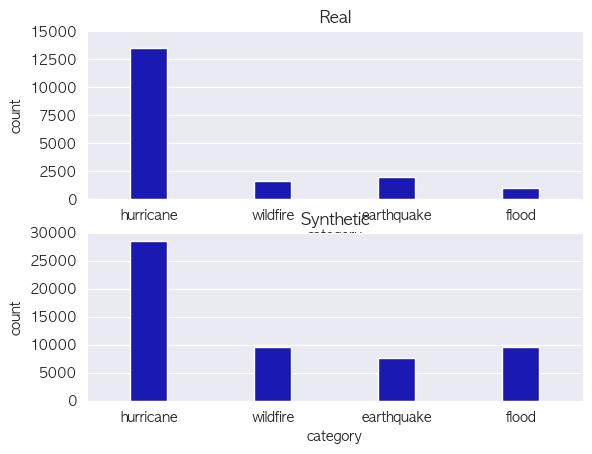

In [151]:
import seaborn as sns

fig, ax =plt.subplots(2,1)
sns.countplot(data=df_final, x='category', ax=ax[0], color='#0000CD', width=0.3).set_title('Real')
sns.countplot(data=synthetic_data_final, x='category', ax=ax[1], color='#0000CD', width=0.3).set_title('Synthetic')

fig.show()

In [152]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [153]:
synthetic_data_final['tweet_text']

0        Day 23 (+12 day intermission): Swansboro to Vi...
1        RT @sapphixy: Prisoners rescue deaf dogs evacu...
2        Spoiler alert, the Jones Act is problematic an...
3        Trump unveils plan to fight California wildfir...
4        https://t.co/CVNrQt51za #style Nike Air 323085...
                               ...                        
55378    Diego Luna takes a knee on â€˜Conanâ€™ and get...
55379    Unsafe building, earthquake result in west of ...
55380    Rescue crews in Mexico City are still trying t...
55381    Severe Thunderstorm Warning continues for Mora...
55382    Huge earthquake could 'strike TODAY' says prop...
Name: tweet_text, Length: 55383, dtype: object

In [154]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
synthetic_data_final['tweet_text'] = synthetic_data_final['tweet_text'].apply(clean_text)
synthetic_data_final['tweet_text']

/var/folders/b9/8j1qkty17r9244bwmgfs9kdc0000gn/T/ipykernel_45034/2623242379.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


0        day 23 +12 day intermission swansboro virginia...
1        rt sapphixy prisoners rescue deaf dogs evacuat...
2        spoiler alert jones act problematic needs repe...
3        trump unveils plan fight california wildfires ...
4        https tco cvnrqt51za #style nike air 323085164...
                               ...                        
55378    diego luna takes knee conan gets emotional mex...
55379    unsafe building earthquake result west iran ht...
55380    rescue crews mexico city still trying reach su...
55381    severe thunderstorm warning continues mora nm ...
55382    huge earthquake could strike today says prophe...
Name: tweet_text, Length: 55383, dtype: object

In [155]:
synthetic_data_final['tweet_text'].apply(lambda x: len(x.split(' '))).sum()

753013

In [171]:
X = synthetic_data_final.tweet_text
y = synthetic_data_final.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [166]:
my_tags=['hurricane', 'wildfire', 'earthquake', 'flood']

In [167]:
%%time
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8214866084863075
              precision    recall  f1-score   support

   hurricane       0.77      0.54      0.63      2313
    wildfire       0.86      0.75      0.80      2822
  earthquake       0.80      0.95      0.87      8548
       flood       0.88      0.74      0.80      2932

    accuracy                           0.82     16615
   macro avg       0.83      0.74      0.78     16615
weighted avg       0.82      0.82      0.81     16615

CPU times: user 540 ms, sys: 15.4 ms, total: 556 ms
Wall time: 556 ms


In [172]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_mat = vectorizer.transform(X_train)
X_test_mat  = vectorizer.transform(X_test)

print(X_train_mat.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [161]:
df_final['tweet_text'] = df_final['tweet_text'].apply(clean_text)
df_final['tweet_text']

0        congrats hitting yoir goal guys im sure victim...
1        rt ajwamood #ajwamood harvey first major hurri...
2        rt ajwamood #ajwamood harvey first major hurri...
3        rt ajwamood #ajwamood harvey first major hurri...
4        rt ajwamood #ajwamood harvey first major hurri...
                               ...                        
18077         get mora try whole menu https tco we0jhsl5pc
18078    mirka mora b1928 noted frenchborn australian c...
18079    paulmalignaggi lol u sergio mora didnt horn wi...
18080    #cameroon 4 #female suicide #bombers kill 1 mo...
18081    rt saakey6251413 happened visit #cyclonemora b...
Name: tweet_text, Length: 18082, dtype: object

In [162]:
df_final['tweet_text'].apply(lambda x: len(x.split(' '))).sum()

245982

In [163]:
X = df_final.tweet_text
y = df_final.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [164]:
%%time
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.807926267281106
              precision    recall  f1-score   support

   hurricane       1.00      0.34      0.51       604
    wildfire       1.00      0.08      0.15       295
  earthquake       0.80      1.00      0.89      4065
       flood       1.00      0.19      0.32       461

    accuracy                           0.81      5425
   macro avg       0.95      0.40      0.47      5425
weighted avg       0.85      0.81      0.76      5425

CPU times: user 207 ms, sys: 7.03 ms, total: 214 ms
Wall time: 213 ms
